In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Time evolution of centers

In [31]:
# plot the clusters centers
def plot_centers(subject, run, sensor, nclusters, file_path,
                xlim_lying=None, ylim_lying=None, xlim_walking=None, ylim_walking=None):
                
    """
    plot the clusters centers for a given subject, run and nclusters
    """
    data_lying = pd.read_csv('clustering_results/subject_{}/run_{}/lying/sensor_type_{}/{}_clusters.csv'.format(subject, run, sensor, nclusters))
    data_walking = pd.read_csv('clustering_results/subject_{}/run_{}/walking/sensor_type_{}/{}_clusters.csv'.format(subject, run, sensor, nclusters))
         
    sns.set_theme(style="white", font_scale=2, palette='Dark2')
    fig, ax = plt.subplots(2, 1, figsize=(20, 12))

    LINEWIDTH = 3
    for i in range(nclusters):
        ax[0].plot (data_lying['MILLISEC'], data_lying['center {}'.format(i)], 
            label='lying center {}'.format(i), linewidth=LINEWIDTH)
        ax[1].plot (data_walking['MILLISEC'], data_walking['centers {}'.format(i)],
            label='walking center {}'.format(i), linewidth=LINEWIDTH)

    ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.)
    if xlim_lying is not None: ax[0].set_xlim(xlim_lying)
    if ylim_lying is not None: ax[0].set_ylim(ylim_lying)
    ax[0].set_xlabel('Time (ms)')
    ax[0].set_ylabel('Signal')

    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.)
    if xlim_walking is not None: ax[1].set_xlim(xlim_walking)
    if ylim_walking is not None: ax[1].set_ylim(ylim_walking)
    ax[1].set_xlabel('Time (ms)')
    ax[1].set_ylabel('Signal')

    fig.savefig(file_path, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'clustering_results/subject_1/run_1/lying/sensor_type_IMU_acc/4_clusters.csv'

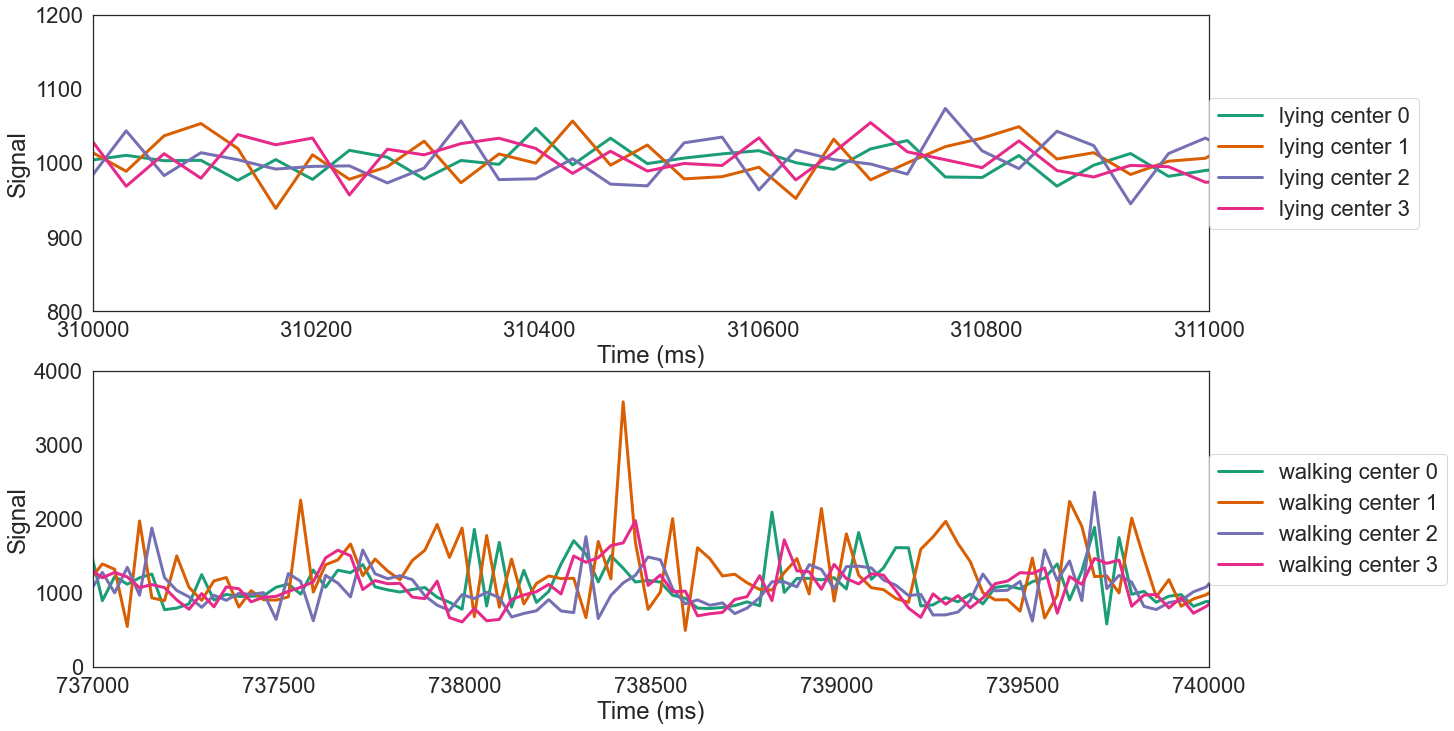

In [34]:
subject = 1
run = 1
cluster_n = 4
sensor = 'all'

for c in [2,3,4,6,8,10]:
    path = 'clustering_results/subject_{}/run_{}/sensor_type_{}/{}_centers.pdf'.format(subject, run, sensor, cluster_n)

    plot_centers(1, 1, 'triaxial_acc', c,path, (0.31e6, 0.311e6), (800, 1200),(0.737e6, 0.74e6),(-10, 4000)) # subject 1, run 1, sensor triaxial_acc, nclusters 2
    plot_centers(1, 1, 'IMU_acc', c,path, (0.31e6, 0.311e6), (950, 1050),(0.737e6, 0.74e6),(-10, 4000)) # subject 1, run 1, sensor IMU_acc, nclusters 2
    plot_centers(1, 1, 'IMU_gyro', c,path,  (0.31e6, 0.311e6), (-50, 200),(0.737e6, 0.74e6),(-10, 5100)) # subject 1, run 1, sensor IMU_gyro, nclusters 2
    plot_centers(1, 1, 'IMU_mag', c, path, (0.31e6, 0.311e6), (1000, 1300),(0.739e6, 0.745e6),(-10, 1100)) # subject 1, run 1, sensor triaxial_acc, nclusters 2
    plot_centers(1, 1, 'all', c, path, (0.31e6, 0.311e6), (-10, 1200),(0.737e6, 0.74e6),(-10, 5100)) # subject 1, run 1, sensor all

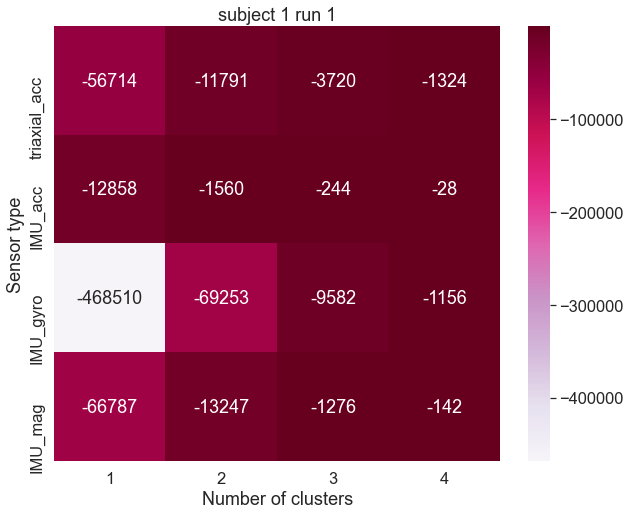

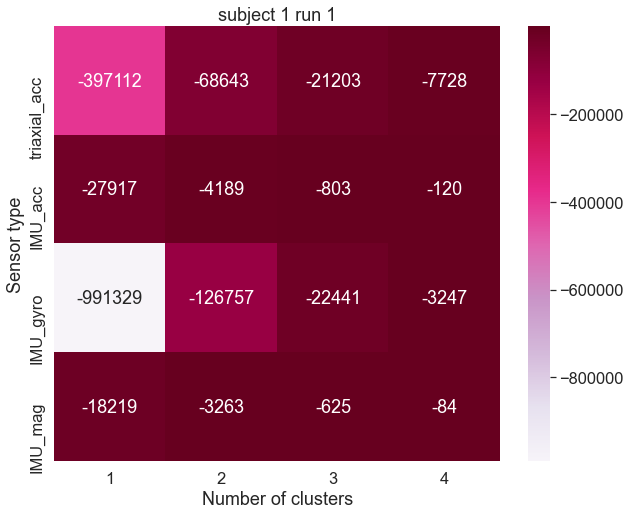

In [18]:
subject = 1
run = 1

#for each subject and run draw compute the average score and plot an heatmap: nclusters vs sensor

def plot_heatmap(subject, run, state = 'lying'):
    path = 'clustering_results/subject_{}/run_{}/{}'.format(subject, run, state)
    sensors = ['triaxial_acc', 'IMU_acc', 'IMU_gyro', 'IMU_mag']
    nclusters = [1,2,3,4]
    scores = np.zeros((len(sensors), len(nclusters)))
    for i, sensor in enumerate(sensors):
        for j, ncluster in enumerate(nclusters):
            scores[i,j] = np.mean(pd.read_csv('{}/sensor_type_{}/{}_clusters.csv'.format(path, sensor, ncluster))['score'])
    sns.set_theme(style="white", font_scale=1.5, palette='Dark2')
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    sns.heatmap(scores, annot=True, fmt='.0f', cmap='PuRd', ax=ax)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Sensor type')
    ax.set_title('subject {} run {}'.format(subject, run))
    ax.set_xticklabels(nclusters)
    ax.set_yticklabels(sensors)

plot_heatmap(subject, run, 'lying')
plot_heatmap(subject, run, 'walking')

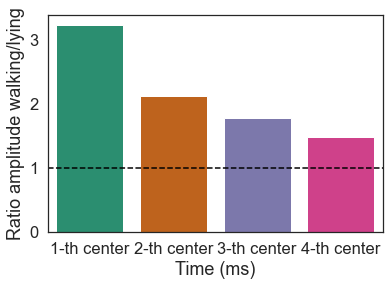

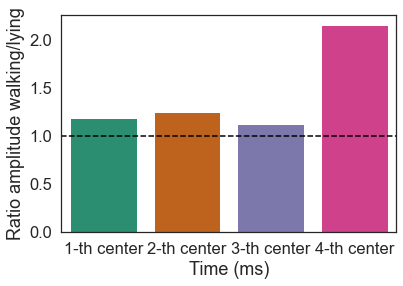

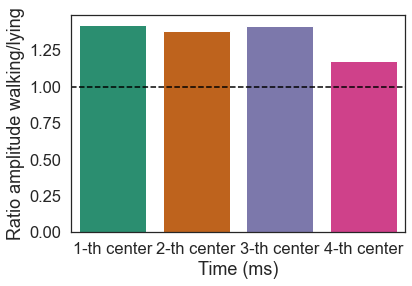

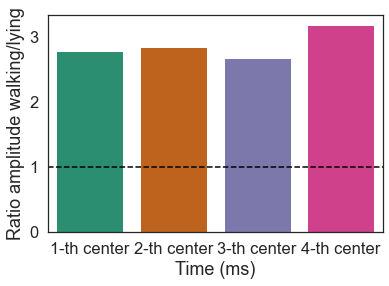

In [48]:
# average amplitude lying vs walking
def plot_average_amplitude(subject, run, sensor, ncluster):
    pathlying = 'clustering_results/subject_{}/run_{}/lying/sensor_type_{}/{}_clusters.csv'.format(subject, run, sensor, ncluster)
    pathwalking = 'clustering_results/subject_{}/run_{}/walking/sensor_type_{}/{}_clusters.csv'.format(subject, run, sensor, ncluster)
    datalying = pd.read_csv(pathlying)
    datawalking = pd.read_csv(pathwalking)

    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    amplitude_walking  = [np.max(datawalking['centers {}'.format(c)])-np.min(datawalking['centers {}'.format(c)]) for c in range(ncluster)]
    amplitude_lying = [np.max(datalying['center {}'.format(c)])-np.min(datalying['center {}'.format(c)]) for c in range(ncluster)]
    amplitude_ratio = [b/a for a,b in zip(amplitude_lying, amplitude_walking)]
        
    sns.barplot(x =['{}-th center'.format(c) for c in range(1,ncluster+1)], y = amplitude_ratio, ax=ax)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Ratio amplitude walking/lying')
    ax.axhline(1, color='black', linestyle='--')


plot_average_amplitude(subject, run, 'triaxial_acc', 4)
plot_average_amplitude(subject, run, 'IMU_acc', 4)
plot_average_amplitude(subject, run, 'IMU_gyro', 4)
plot_average_amplitude(subject, run, 'IMU_mag', 4)

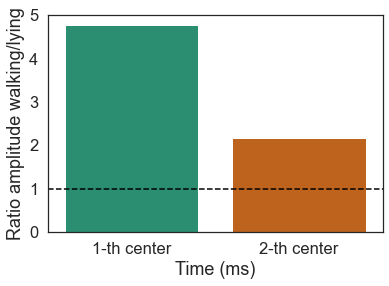

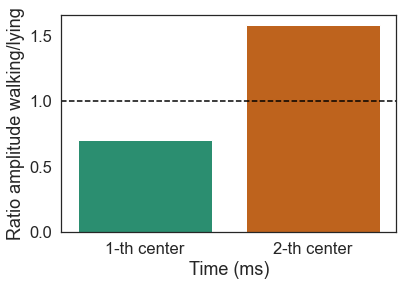

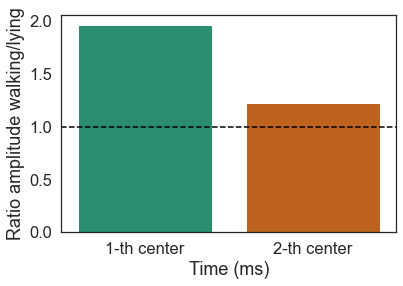

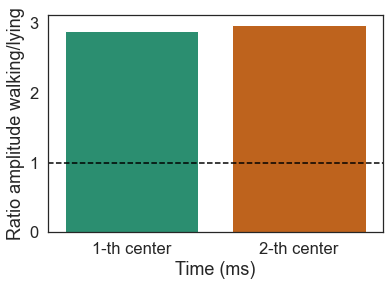

In [49]:
plot_average_amplitude(subject, run, 'triaxial_acc', 2)
plot_average_amplitude(subject, run, 'IMU_acc', 2)
plot_average_amplitude(subject, run, 'IMU_gyro', 2)
plot_average_amplitude(subject, run, 'IMU_mag', 2)